# Scraping Twitter Data

1. creating developer account

2. introduction to main functions of Twitter API - json structure of a file + Tweepy

3. making queries

4. downloading user timeline - last 3200 users

5. streaming

6. let's analyze the json data

In [309]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
from config import *
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import string
import unidecode

# 1. Developer account

**1st step** First of all, let's create a Twitter account and then go to the developer website at the link

https://developer.twitter.com/en/apps

**2nd step** Then we click on **Create an app**

![alt-text-1](imgs/create-app.png "title-1")

**3rd step** We need to fill the form with some basic informations as shown below

![alt-text-1](imgs/top.png "Top-page") ![alt-text-2](imgs/bottom.png "Bottom-page")

**4th step** We need to copy and paste below the token and consumer keys (click on *Generate*)

![alt-text-1](imgs/access-token.png "title-1")

In [6]:
## access token informations 
access_token1 = "1713827162-u7FwIX40Ik9ZOGFdOhvQ8ptdeFkYDgD7D9vykV9"
access_token_secret1 = "6G55EqsADCYfTNFxA1Nq6apNqszSXLkovDHXuhppWdLLt"

consumer_key1 = "iO6qKvIwdpcEs8tdhAVKZPBa7"
consumer_secret1 = "TYyl5uKremIto1YD0nsF7HkfwoOIRpjpCHJjmHgzzHKwKSOUkh"

In [8]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import json
import datetime

In [9]:
auth = OAuthHandler(consumer_key1, consumer_secret1)
auth.set_access_token(access_token1, access_token_secret1)
api = API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# 2. Introduction to main functions of Twitter API + Tweepy

**What is Twitter**

It is an online social network, which allows users to post short messages/status, 280-character each tweets. Because of the continous flood of tweets generated everyday, Twitter is a great source to get rapid and current information through the web. It can be particularly useful to understand how people interacts with respect a specific (current) topic, how they discuss and create conversations (e.g. threads) or just to keep yourself posted about what's happening around the world.

**Why Twitter for scraping data**

In the last years, with the limitations imposed by law restrictions, accessing social media data through scraping is becoming a challenging task. Nevertheless, Twitter remains (with Reddit) one of the few that is still accessible and relatively open to do research studies and analyze aggregated social network data.

**Main functionalities of the Twitter API**

Through the Twitter API, any developer can access in several ways Twitter data. It's possible to retrieve users timeline (all the last 3200 tweets posted by a single user), it's possible to collect conversation around a topic, up to 7 days before and, as main functionality, it's possible to track the live stream of information related to a specific topic (which can be easily tracked through hashtags).


**Python library Tweepy**

Tweepy is a popular Python library that helps us to play with Twitter API.

**Some practical examples of studies performed using Twitter Data**

Here some studies performed analyzing Twitter Data:
- [Quantifying Controversy in Social Media](https://arxiv.org/abs/1507.05224)
- [Falling into the Echo Chamber: The Italian Vaccination Debate on Twitter](https://ojs.aaai.org//index.php/ICWSM/article/view/7285)
- [Communication Dynamics in Twitter During Political
Campaigns: The Case of the 2011 Spanish National
Election](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.701.4830&rep=rep1&type=pdf)

# 3. Downloading user timeline

Analysis of user json and explaining the main limitation (3200 users)



Reference: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline

```:allowed_param: 'id', 'user_id', 'screen_name', 'since_id', 'max_id', 'count', 'include_rts', 'trim_user', 'exclude_replies'```

In [11]:
user_timeline = api.user_timeline(
    screen_name="fra_fabbri", # you can user user_id or id too
    count=200, # 200 is the max-value
    include_rts = True, # include also retweeted status
)

In [12]:
print("Numer of tweets")
print(len(user_timeline))

Numer of tweets
169


In [13]:
for k in user_timeline[0]._json["user"]:
    print(k)
    print(user_timeline[0]._json["user"][k])
    print()

id
1524907406

id_str
1524907406

name
Francesco Fabbri

screen_name
Fra_Fabbri

location
Barcellona, Spagna

description
Ph.D. Student at @WSSC_UPF mainly interested in Algorithmic Fairness | @DTIC_UPF | @eurecat_news | ex-@picampusschool scholar

url
https://t.co/UaMic2k7ed

entities
{'url': {'urls': [{'url': 'https://t.co/UaMic2k7ed', 'expanded_url': 'http://frafabbri.github.io', 'display_url': 'frafabbri.github.io', 'indices': [0, 23]}]}, 'description': {'urls': []}}

protected
False

followers_count
212

friends_count
924

listed_count
3

created_at
Mon Jun 17 13:51:31 +0000 2013

favourites_count
1764

utc_offset
None

time_zone
None

geo_enabled
False

verified
False

statuses_count
169

lang
None

contributors_enabled
False

is_translator
False

is_translation_enabled
False

profile_background_color
C0DEED

profile_background_image_url
http://abs.twimg.com/images/themes/theme1/bg.png

profile_background_image_url_https
https://abs.twimg.com/images/themes/theme1/bg.png

profile_

**So we get only the last 200? What about all the other tweets?**

With the Standard Twitter API we can get up to the last 3200 tweets. If we want more, we have to get premium account, which is quite expensive. In our case we don't really need it, because we mainly work with streaming data, which produces good amount of data in relative short amount of time.

**But... How do we get the 3200 tweets for one user?** 

It's possible to retrieve the last tweets of all the public users (private ones we can't). In the following example we will go through the last 3200 tweets of Donald Trump (@realDonaldTrump).


Reference: http://docs.tweepy.org/en/latest/cursor_tutorial.html

Using *Cursor* we try to collect all the tweets generated by Donald Trump

In [312]:
all_pages[0]['favorite_count']
    

TypeError: 'Status' object is not subscriptable

In [157]:
all_pages = []
for page in Cursor(
    api.user_timeline, 
    screen_name= '@realDonaldTrump', 
    count= 3200,
    tweet_mode="extend"
    ).pages():
    all_pages +=page
    

Print the text of the tweet with more likes

In [316]:
more_likes = 0
text_with_more_likes = ""
for tweet in all_pages:
    json_data = tweet._json
    likes_tweet = json_data['favorite_count']

    if likes_tweet > more_likes:
        more_likes = likes_tweet
        #text_with_more_likes = json_data["full_text"]

In [317]:
more_likes

600916

Print the text of the tweet with more retweets

In [319]:
more_retweets = 0
text_with_more_retweets = ""
for tweet in all_pages:
    json_data = tweet._json

    num_retweets = json_data['retweet_count']
    if num_retweets > more_retweets:
        more_retweets = num_retweets
        #text_with_more_retweets = json_data['full_text']

In [320]:
more_retweets

104892

# 4 Streaming API

The Twitter API allows you to collect the public stream of Tweets, filtering them by topic. To do so, we need to set a "Listener", through Tweepy, in order to set some parameters like how much tweets to collect, how to store them, how to handle errors, etc... 

In [19]:
class MyStreamListener(StreamListener):
    """
    Twitter listener, collects streaming tweets and output to a file
    """
    def __init__(self, api, OUTPUT_FILENAME, stop_condition=10):
        """
        initialize the stream, with num. of tweets and saving the outputfile
        """
        
        # this line is needed to import the characteristics of the streaming API
        super(MyStreamListener, self).__init__()
        
        # to-count the number of tweets collected        
        self.num_tweets = 0
        
        # save filename
        self.filename = OUTPUT_FILENAME
        
        # stop-condition
        self.stop_condition = stop_condition
        

    def on_status(self, status):
        
        """
        this function runs each time a new bunch of tweets is retrived from the streaming
        """
        
        with open(self.filename, "a+") as f:
            tweet = status._json
            
            f.write(json.dumps(tweet) + '\n')
            #self.output.append(tweet)
            self.num_tweets += 1
        
            # Stop condition        
            if self.num_tweets <= self.stop_condition:
                return True
            else:
                return False
        

    def on_error(self, status):
        """
        function useful to handle errors. It's possible to personalize it 
        depending on the way we want to handle errors
        """
        
        print(status)
        #returning False in on_error disconnects the stream
        return False

Let's analyze ```filter```, one of the crucial functions we run later. Running it we retrieve all the tweets having one of the substrings included in the list keywords.

Here a brief summary for the options included in the function:

- ```track``` put here the list of keywords you want to track. Pay attention that if you want to track hashtags you have to put the #, and for mentions @

- ```is_async``` boolean that let you run in async the streaming. We strongly suggest to have it always ```False```

- ```languages``` default ```None```. Twitter runs an automatic language detection algorithm, which in most of the cases can associated to the tweets the respective language (e.g. output ```"en"```, ```"it"```, ```"es"```, etc ..., ```"unk"``` for undetected ones). If you don't filter through this parameter, it will return tweets in any language. 

**Long story short:** If you think your topic is highly relevant only for a specific subgroup in twitter that talks only one language, then is better to avoid it. This is why the automatic detection doesn't have a 100% accuracy. Otherwise, it's strongly suggested. For *all* the topics listed in the project we strongly encourage you to filter tweets in English.

For more details:

https://developer.twitter.com/en/docs/twitter-api/v1/tweets/filter-realtime/guides/basic-stream-parameters

Here we download a bunch of tweets with a set of keywords related to covid ```["coronavirus", "covid"]```

In [ ]:
%%time

OUTPUT_FILENAME = "data/one.json"
stop_condition = 100000

l = MyStreamListener(api, OUTPUT_FILENAME, stop_condition)
# here we recall the Stream Class from Tweepy to input the authentication info and our personalized listener 
stream = Stream(auth=api.auth, listener=l)


# keywords we may want decide to track 
TRACKING_KEYWORDS = ["#covid19","#Covid19","#COVID19","#covid","#coronavirus","#pcr","#Covid-19","#quarantine","confinement"
                     ,"Covid19","coronavirus","COVID19","PCR","Covid-19","#Covid-19", "Coronavirus","Antibody",
                     "Social distancing","epidemic","pandemic","Asymptomatic","vaccine"]
stream.filter(
    track=TRACKING_KEYWORDS, 
    is_async=False, 
    languages = ["en"]
)

# 5. Let's analyze the json data

**A. Statistical description of data**
    
- how many retweets?
- how many users?
- how many unique tweets?
- mostfrequent hashtags

**B. Wordcloud**
- wordcloud of hashtags
- generate ```bag_of_words``` from tweets
- wordcloud of text

**C. Retweet graph**

- build network of retweet
- find nodes with highest in-degree
- compute other nodes' centralities

## A. Data structure

In [278]:
with open("data/one.json", "rb") as f:
    data = f.readlines()
    data = [json.loads(str_) for str_ in data]

In [279]:
df_tweets = pd.DataFrame.from_records(data)

In [280]:
df_tweets.head(2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,extended_entities,withheld_in_countries
0,Thu Dec 17 14:41:35 +0000 2020,1339581514619613185,1339581514619613185,"Interior Secretary David Bernhardt, a Colorado...","<a href=""https://about.twitter.com/products/tw...",False,NaN,None,NaN,None,...,1608216095963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Dec 17 14:41:35 +0000 2020,1339581514619621380,1339581514619621380,RT @joy139: I hate this year. 💔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,1608216095963,{'created_at': 'Thu Dec 17 12:39:12 +0000 2020...,1.339466e+18,1339465611798310912,{'created_at': 'Thu Dec 17 07:01:02 +0000 2020...,"{'url': 'https://t.co/nMDvfpGPds', 'expanded':...",NaN,NaN,NaN,NaN


In [281]:
def print_retweets_uniqueTweets_uniqueUsers(df_tweets):
    retweets_ = df_tweets["retweeted_status"].apply(lambda x: 0 if str(x) == 'nan' else 1)
    tot_retweets = sum(retweets_)
    unique_tweets = len(retweets_) - tot_retweets
    
    users_ = df_tweets.user.apply(lambda x: x['id'])
    
    tot_users = len(set(users_))
    
    print("Tot Retweets")
    print(tot_retweets)

    print("Unique Tweets")
    print(unique_tweets)
    
    print("Unique Users")
    print(tot_users)

In [282]:
print_retweets_uniqueTweets_uniqueUsers(df_tweets)

Tot Retweets
152015
Unique Tweets
65849
Unique Users
160110


In [283]:
hashtags_lists = df_tweets["entities"].apply(lambda x: x['hashtags'])
hashtags_lists[0][0]['text']

'copolitics'

In [284]:
def extract_hashtags():
    """
    
    """
    
    hashtags_lists = df_tweets["entities"].apply(lambda x: x['hashtags'])
    
    hashtags = hashtags_lists.apply(lambda x: x[0]['text'].lower() if x != [] else None)
    
    hashtags_by_frequency = Counter(hashtags)
    hashtags_by_frequency = {k: hashtags_by_frequency[k] for k in hashtags_by_frequency if k != None}
    
    return hashtags_by_frequency

In [285]:
hashtags_by_frequency = extract_hashtags()

Let's plot the top-5 frequent hashtags now

In [286]:
df_hashtags = pd.DataFrame(hashtags_by_frequency.items())
df_hashtags.columns = ["hashtag", "count"]
df_hashtags.set_index("hashtag", inplace=True)
df_hashtags.sort_values("count", inplace=True, ascending=False)

/Users/joan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/joan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)


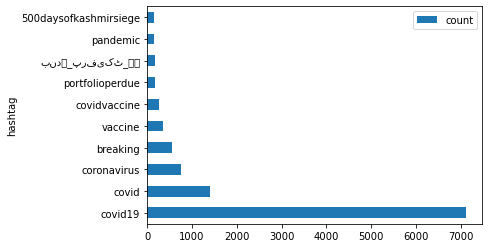

In [287]:
df_hashtags.head(10).plot.barh()
plt.show()

Let's try now to generate a wordcloud given the tweets we have collected.

# B. Wordcloud

In [288]:
from wordcloud import WordCloud, ImageColorGenerator
import re

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))
ps = PorterStemmer()

In [289]:
def remove_links(text):
    if text:
        return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    
    # In case there is no text
    return ""

def remove_hashtags(text):
    if text:
        return re.sub(r'#\w+ ?', '', text)
    
    return ""
def remove_accents(text):
    if text:
        return unidecode.unidecode(text)
        

    # In case there is no text
    return ""

def remove_punctuation_marks(text):
    if text:
        translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
        new_text = text.translate(translator)
        return " ".join(new_text.split())
        
    # In case there is no text
    return ""

def text_to_lower_case(text):
    if text:
        return text.lower()
    
    # In case there is no text
    return ""

def remove_emojis(text):
    if text:
        # TODO: Remove emojis (tip: search for encode - decode)
        returnString = ""
        for character in text:
            try:
                character.encode("ascii")
                returnString += character
            except UnicodeEncodeError:
                returnString += ''
        text = " ".join(returnString.split())
        
    return text

    # In case there is no text
    return ""

def remove_multiple_whitespaces(text):
    if text:
        return " ".join(text.split())

    # In case there is no text
    return ""

def remove_text_marks(text):
    if text:
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # TODO: replace *, ?, ... by spaces
        
        return text.strip()
    
    # In case there is no text
    return ""

def split_text_and_numbers(text):
    temp = re.compile("([a-zA-Z]+)([0-9]+)") 
    try:
        res = temp.match(text).groups()
        text = " ".join(res)
    except:
        text = text
    return text

def remove_alone_numbers(text):
    if text:
        text = ' '.join(filter(lambda word:word.replace('.','').isdigit()==False, text.split()))
        
        return text
    
    return ""

def remove_stopwords(text):
    text = text.split()
    return " ".join([x for x in text if x not in STOPWORDS])

def stemming(text):
    text = text.split()
    return " ".join([ps.stem(x) for x in text])

def clean_text(text):
    # Apply the different functions in order to clean the text
    text = remove_links(text)
    text = remove_hashtags(text)
    text = text_to_lower_case(text)
    text = remove_text_marks(text)
    text = remove_accents(text)
    text = remove_emojis(text)
    text = split_text_and_numbers(text)
    #text = remove_alone_numbers(text)
    text = remove_multiple_whitespaces(text)
    text = remove_punctuation_marks(text)
    text = remove_stopwords(text)
    text = stemming(text)
    
    # Return
    return text

In [290]:
print(clean_text(df_tweets['text'][0])+'\n\n')
print(df_tweets['text'][0])

interior secretari david bernhardt colorado nativ latest trump offici catch coronaviru


Interior Secretary David Bernhardt, a Colorado native, latest Trump official to catch coronavirus https://t.co/d7XjCd3w8Q #copolitics


In [291]:
bag_of_words = {}
for text in df_tweets["text"]:
    
    # remove "RT" string indicating a retweet
    text = text.replace("RT ", "").strip()
    
    # lowering text
    text = text.lower()
    
    # removing all the punctuations
    text = re.sub(r'[^\w\s]','', text).strip()
    
    # tokenize the text
    lst_text = text.split()
    
    # remove stopwords
    lst_text = [x for x in lst_text if x not in STOPWORDS]
    
    #stemming
    ps = PorterStemmer() 
        
    # create bag-of-words - for each word the frequency of the word in the corpus
    for w in lst_text:
        if w not in bag_of_words:
            bag_of_words[w] = 0
        bag_of_words[w] += 1

In [292]:
def plot_wordcloud(title, dic_):
    fig, ax = plt.subplots(1, 1, figsize=(18,7))
    wordcloud = WordCloud(background_color="white",width=1600, height=800)
    wordcloud = wordcloud.generate_from_frequencies(dic_)
    ax.axis("off")     
    ax.imshow(wordcloud, interpolation='bilinear')

    ax.set_title(title)
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

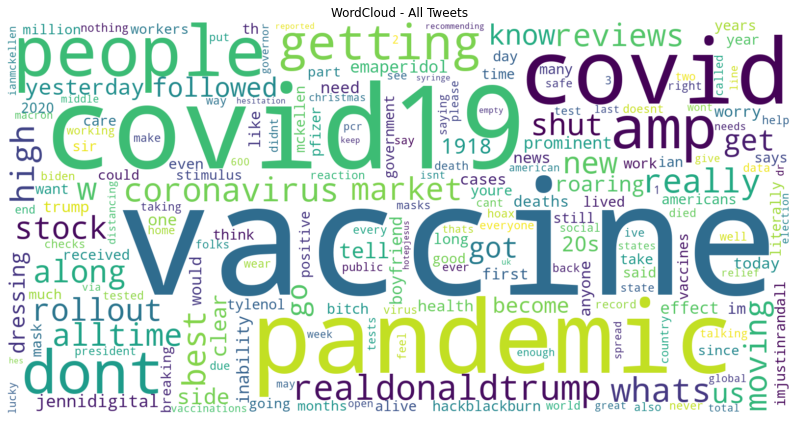

In [293]:
plot_wordcloud("WordCloud - All Tweets", bag_of_words)

## C. Retweet graph

In [294]:
df_retweets = df_tweets[df_tweets['text'].apply(lambda x: x[:2]) == "RT"]

In [295]:
df_graph = pd.DataFrame(columns=["source", "destination"])

# add source-nodes
df_graph["source"] = df_tweets['user'].apply(lambda x: x['screen_name'])

# add destination-nodes
df_graph["destination"] = df_tweets['retweeted_status'].apply(lambda x: x['user']['screen_name'] if str(x) !='nan' else None)

In [296]:
df_graph.drop_duplicates(inplace=True)
df_graph.head()

,source,destination
0,ColoradoSun,None
1,22samurai,joy139
2,FCN2go,RenataFCNews
3,sailorrooscout,sailorrooscout
4,JanetMarks20,RealCandaceO


We now analyze the retweet graph, given by user-user interactions. The graph G=(V,E) is generate, where V is the set of users and a generic edge (u,v) is created if user u retweeted a post of the user v.

We look at nodes properties, such in-degree, closeness centrality and pagerank.

A fast recap of the measures we're goin to use:

- **closeness centrality**: *it is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes* ([link](https://en.wikipedia.org/wiki/Closeness_centrality)).

- **pagerank**: It defines a probability distribution over all the nodes in the graph. A score/probability assigned to each node indicates the importance of the single node, taking into account both local and global structure of the graph ([link](https://en.wikipedia.org/wiki/PageRank)).

In [297]:
import networkx as nx

In [298]:
G = nx.DiGraph()
G.add_edges_from(df_graph.values)
topk = 10

In [299]:
topk_indegree = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:topk]

In [300]:
topk_indegree

[(None, 52816),
 ('realDonaldTrump', 11077),
 ('JenniDigital', 7251),
 ('Emaperidol', 6492),
 ('imjustinrandall', 3613),
 ('HackBlackburn', 2948),
 ('JDaQue2', 1424),
 ('IanMcKellen', 1413),
 ('HotepJesus', 1340),
 ('Timcast', 1100)]

In [301]:
topk_pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)[:topk]

In [302]:
topk_pagerank

[(None, 0.1344042785944646),
 ('realDonaldTrump', 0.01106555355475252),
 ('JenniDigital', 0.007873119677514329),
 ('Emaperidol', 0.006955949373021618),
 ('imjustinrandall', 0.003912090276803146),
 ('HackBlackburn', 0.0032008599172578924),
 ('IanMcKellen', 0.0017369835848462488),
 ('JDaQue2', 0.0015489223625644911),
 ('HotepJesus', 0.0012984763010586544),
 ('SkHATERboi', 0.0010801018810158213)]

In [303]:
topk_closeness = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:topk]

In [304]:
topk_closeness

[(None, 0.39509298016904787),
 ('realDonaldTrump', 0.0629680918806289),
 ('JenniDigital', 0.0420271118060394),
 ('Emaperidol', 0.037642797920283556),
 ('imjustinrandall', 0.020947364593203437),
 ('HackBlackburn', 0.017109602564992023),
 ('IanMcKellen', 0.009574937861867392),
 ('JDaQue2', 0.00825799800367513),
 ('HotepJesus', 0.007769739251421889),
 ('Timcast', 0.006259136369032366)]